Uploading Data


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = pd.read_csv(r"X:\Study\Projects\Cancer Survival Prediction\IDA_DATASET_FULL.csv")


Creating Sample Dataset

In [3]:
#sampled_df= df.sample(n=100000)

sampled_df = sampled_df.reset_index(drop=True)

print(sampled_df.head().to_string())
print(sampled_df.describe().to_string())

   id   age  gender         country diagnosis_date cancer_stage beginning_of_treatment_date family_history  smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer treatment_type end_treatment_date  survived
0   1  64.0  Female         Germany     2016-04-07    Stage III                  2016-04-21             No    Never Smoked  31.1                257             1       1          0             0       Combined         2017-11-15         0
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III                  2023-05-02            Yes  Passive Smoker  25.9                208             1       0          0             0      Radiation         2024-04-25         0
2   3  65.0    Male         Romania     2023-04-07     Stage IV                  2023-04-12             No    Never Smoked  18.9                193             0       0          0             0        Surgery         2025-03-11         0
3   4  51.0  Female          Latvia     2016

In [4]:
print(sampled_df.sort_values(by='age',ascending=True).head().to_string())

              id  age  gender         country diagnosis_date cancer_stage beginning_of_treatment_date family_history  smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer treatment_type end_treatment_date  survived
395903    395904  4.0    Male          Sweden     2020-08-02     Stage IV                  2020-08-09            Yes  Passive Smoker  29.8                223             1       1          0             0       Combined         2021-12-15         1
2801374  2801375  6.0  Female         Denmark     2023-05-17      Stage I                  2023-06-16            Yes  Current Smoker  18.6                169             1       0          1             0       Combined         2024-10-23         0
2699796  2699797  7.0    Male        Slovakia     2017-03-05      Stage I                  2017-04-02            Yes  Passive Smoker  36.0                297             1       1          0             0      Radiation         2018-08-17         1
1751

Pre-Processing

In [5]:
print(sampled_df['age'].median())
print(sampled_df['age'].mean())
print(sampled_df['age'].mode())

55.0
54.99969446153846
0    55.0
Name: age, dtype: float64


In [6]:
#NAN Values
print(sampled_df.isnull().sum())

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64


In [7]:
# Calculate survival rates by treatment type
treatment_survival = sampled_df.groupby('treatment_type')['survived'].value_counts(normalize=True).unstack() * 100
treatment_survival

survived,0,1
treatment_type,,
Chemotherapy,77.987503,22.012497
Combined,78.114114,21.885886
Radiation,78.010201,21.989799
Surgery,78.048016,21.951984


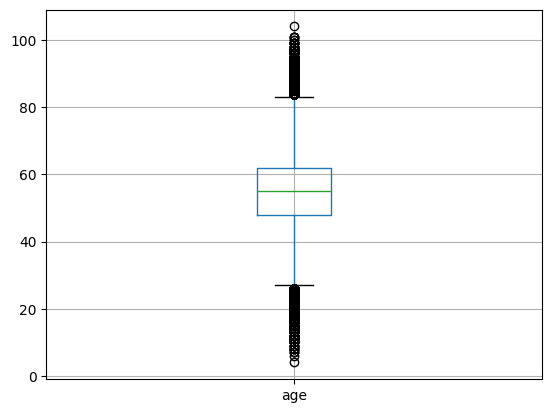

In [8]:
sampled_df.boxplot(column='age')
plt.show()

In [9]:
#outliers - age
q1_age = sampled_df.age.quantile(0.25)
q3_age = sampled_df.age.quantile(0.75)
iqr_age=q3_age-q1_age
lower_limit_age=q1_age - 1.5*iqr_age
upper_limit_age=q3_age + 1.5*iqr_age
outliers_age=sampled_df[(sampled_df.age<lower_limit_age)|(sampled_df.age>upper_limit_age)]
print(outliers_age.value_counts().head().to_string())
print('\n')
print(outliers_age.shape)

id       age   gender  country         diagnosis_date  cancer_stage  beginning_of_treatment_date  family_history  smoking_status  bmi   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  treatment_type  end_treatment_date  survived
3249820  84.0  Male    Netherlands     2023-06-10      Stage I       2023-06-21                   Yes             Never Smoked    19.6  185                0             0       1          0             Combined        2024-07-02          0           1
24       21.0  Female  Czech Republic  2023-05-18      Stage III     2023-05-31                   Yes             Former Smoker   34.9  263                1             1       0          0             Combined        2024-04-12          0           1
478      85.0  Female  Austria         2019-07-31      Stage III     2019-08-11                   No              Current Smoker  24.8  219                1             0       1          0             Chemotherapy    2020-08-14          1          

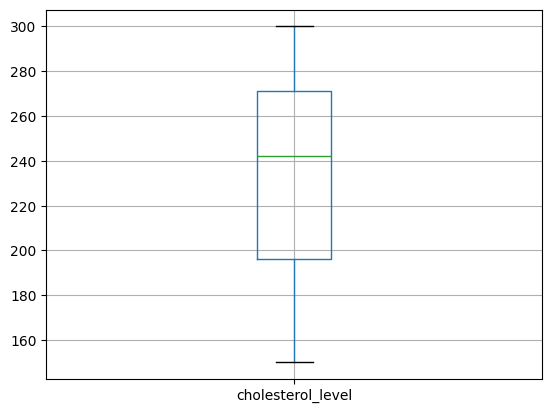

In [10]:
sampled_df.boxplot(column='cholesterol_level')
plt.show()

In [11]:
#outliers - cholestrol
q1_chol = sampled_df.cholesterol_level.quantile(0.25)
q3_chol = sampled_df.cholesterol_level.quantile(0.75)
iqr_chol = q3_chol - q1_chol
lower_limit_chol = q1_chol - 1.5 * iqr_chol
upper_limit_chol = q3_chol + 1.5 * iqr_chol
outliers_chol = sampled_df[(sampled_df.cholesterol_level < lower_limit_chol) | (sampled_df.cholesterol_level > upper_limit_chol)]
print(outliers_chol.value_counts().to_string)
print('\n')
print(outliers_chol.to_string())

<bound method Series.to_string of Series([], Name: count, dtype: int64)>


Empty DataFrame
Columns: [id, age, gender, country, diagnosis_date, cancer_stage, beginning_of_treatment_date, family_history, smoking_status, bmi, cholesterol_level, hypertension, asthma, cirrhosis, other_cancer, treatment_type, end_treatment_date, survived]
Index: []


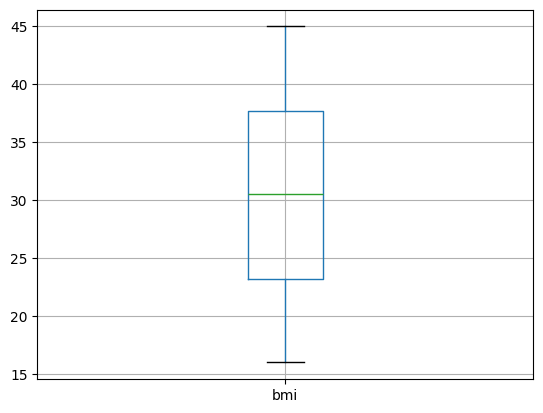

In [12]:
sampled_df.boxplot(column='bmi')
plt.show()

In [13]:
#outliers-bmi
q1_bmi = sampled_df.bmi.quantile(0.25)
q3_bmi = sampled_df.bmi.quantile(0.75)
iqr_bmi = q3_bmi - q1_bmi
lower_limit_bmi = q1_bmi - 1.5 * iqr_bmi
upper_limit_bmi = q3_bmi + 1.5 * iqr_bmi
outliers_bmi = sampled_df[(sampled_df.bmi < lower_limit_bmi) | (sampled_df.bmi > upper_limit_bmi)]
print(outliers_bmi.value_counts().to_string)
print('\n')
print(outliers_bmi.to_string())

<bound method Series.to_string of Series([], Name: count, dtype: int64)>


Empty DataFrame
Columns: [id, age, gender, country, diagnosis_date, cancer_stage, beginning_of_treatment_date, family_history, smoking_status, bmi, cholesterol_level, hypertension, asthma, cirrhosis, other_cancer, treatment_type, end_treatment_date, survived]
Index: []


In [14]:
#Removing outliers in age , only that column has the outliers
new_data=sampled_df[(sampled_df.age>lower_limit_age)&(sampled_df.age<upper_limit_age)]
#Normalisation of data
new_data['age_normalized']=(new_data['age']-new_data['age'].min())/(new_data['age'].max()-new_data['age'].min())
new_data['bmi_normslized']=(new_data['bmi']-new_data['bmi'].min())/(new_data['age'].max()-new_data['bmi'].min())
new_data['cholesterol_normslized']=(new_data['cholesterol_level']-new_data['cholesterol_level'].min())/(new_data['cholesterol_level'].max()-new_data['cholesterol_level'].min())
#Droping useless columns
new_data=new_data.drop('diagnosis_date',axis=1)
new_data=new_data.drop('beginning_of_treatment_date',axis=1)
new_data=new_data.drop('end_treatment_date',axis=1)

print(new_data.head().to_string())

C:\Users\upman\AppData\Local\Temp\ipykernel_34744\3937848395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['age_normalized']=(new_data['age']-new_data['age'].min())/(new_data['age'].max()-new_data['age'].min())
C:\Users\upman\AppData\Local\Temp\ipykernel_34744\3937848395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['bmi_normslized']=(new_data['bmi']-new_data['bmi'].min())/(new_data['age'].max()-new_data['bmi'].min())
C:\Users\upman\AppData\Local\Temp\ipykernel_34744\3937848395

   id   age  gender         country cancer_stage family_history  smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer treatment_type  survived  age_normalized  bmi_normslized  cholesterol_normslized
0   1  64.0  Female         Germany    Stage III             No    Never Smoked  31.1                257             1       1          0             0       Combined         0        0.666667        0.228788                0.713333
1   2  50.0    Male  Czech Republic    Stage III            Yes  Passive Smoker  25.9                208             1       0          0             0      Radiation         0        0.407407        0.150000                0.386667
2   3  65.0    Male         Romania     Stage IV             No    Never Smoked  18.9                193             0       0          0             0        Surgery         0        0.685185        0.043939                0.286667
3   4  51.0  Female          Latvia    Stage III            Yes   Fo

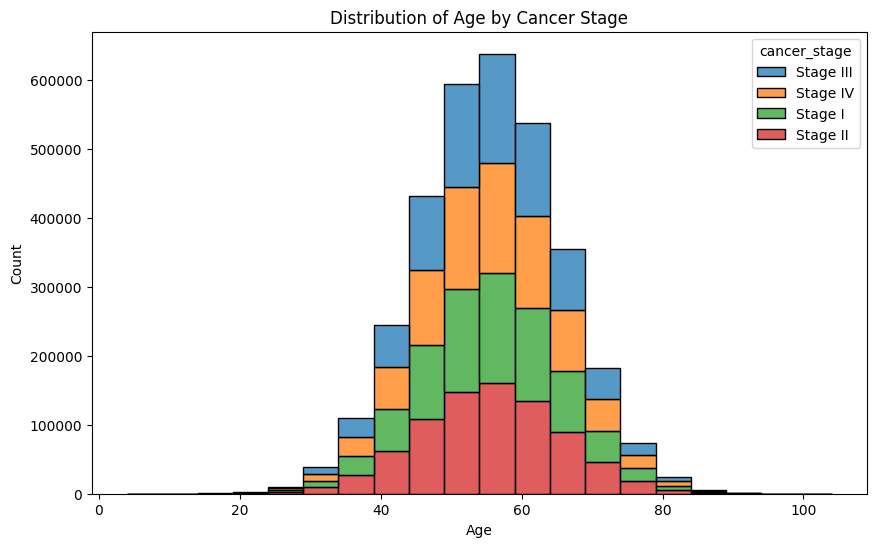

In [15]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(data=sampled_df, x='age', hue='cancer_stage', multiple='stack', bins=20)
plt.title('Distribution of Age by Cancer Stage')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

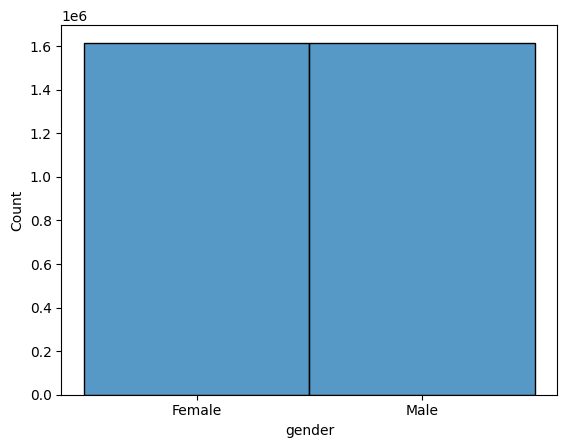

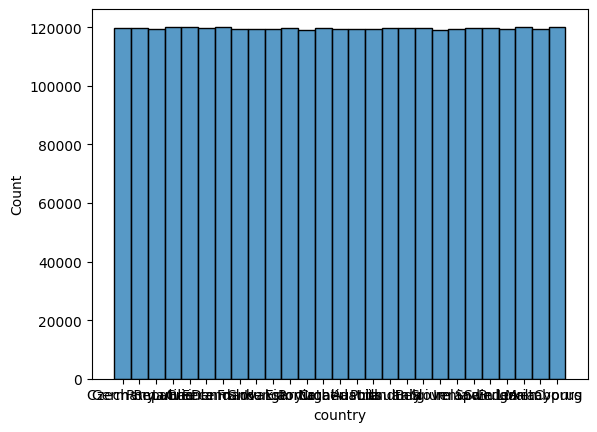

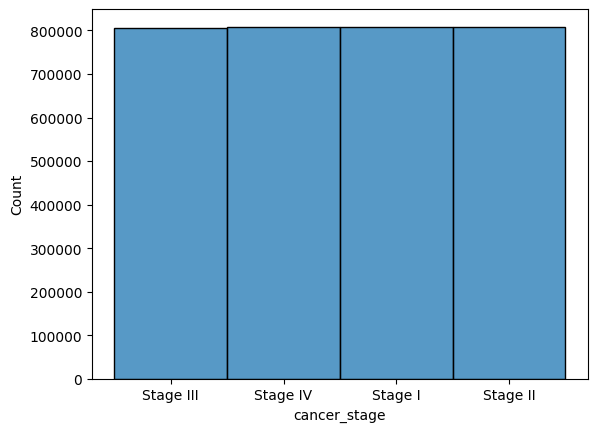

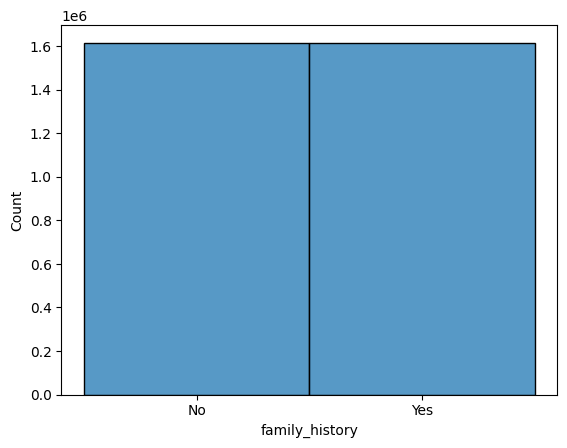

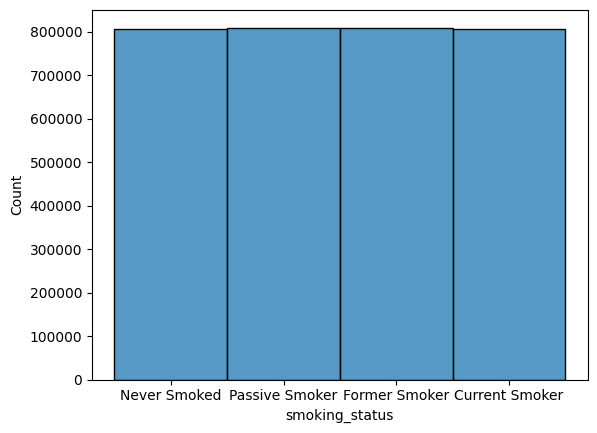

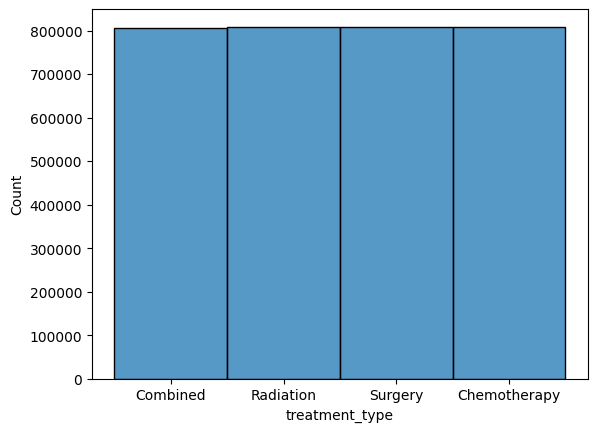

In [16]:
#histogram to understand the distribution
for i in new_data.select_dtypes(include=['object']).columns:
  sns.histplot(new_data[i])
  plt.show()

Co-relations

C:\Users\upman\AppData\Local\Temp\ipykernel_34744\2294443347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='survived', data=survival_rates, palette='viridis')


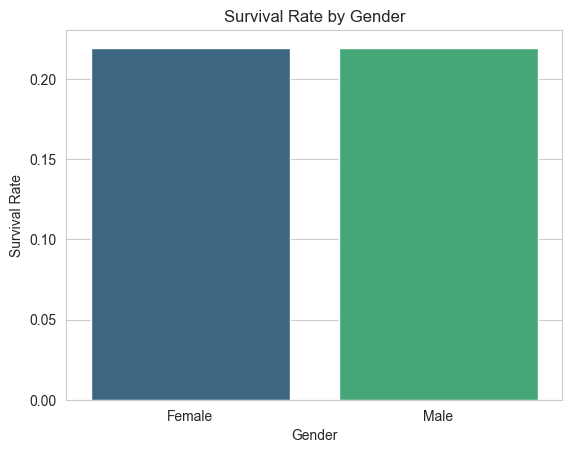

In [17]:
# Calculate survival rates by gender
survival_rates = new_data.groupby('gender')['survived'].mean().reset_index()

# Plotting
sns.set_style('whitegrid')
sns.barplot(x='gender', y='survived', data=survival_rates, palette='viridis')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')

# Show the plot
plt.show()


C:\Users\upman\AppData\Local\Temp\ipykernel_34744\758994566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_labels', y='survived', data=new_data, palette='viridis', edgecolor=None, linewidth=0)


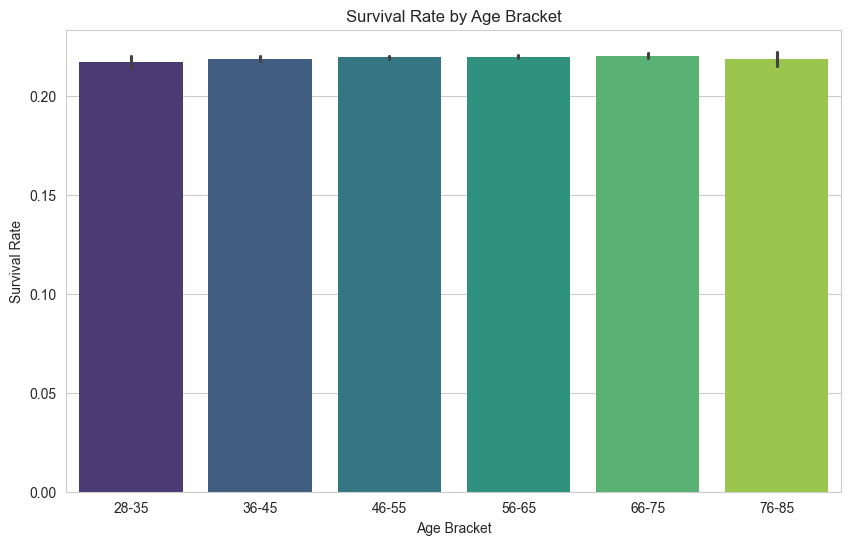

In [18]:
age_labels = ['28-35', '36-45', '46-55', '56-65', '66-75', '76-85']
new_data['age_labels'] = pd.cut(new_data['age'], bins=[28, 35, 45, 55, 65, 75, 85], labels=age_labels)

plt.figure(figsize=(10, 6))

sns.barplot(x='age_labels', y='survived', data=new_data, palette='viridis', edgecolor=None, linewidth=0)

# Add labels and title
plt.xlabel('Age Bracket')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Bracket')

plt.show()

C:\Users\upman\AppData\Local\Temp\ipykernel_34744\2989481388.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_age = new_data.groupby('age_labels')['survived'].mean().reset_index()
C:\Users\upman\AppData\Local\Temp\ipykernel_34744\2989481388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_labels', y='survived', data=survival_rates_age, palette='viridis')


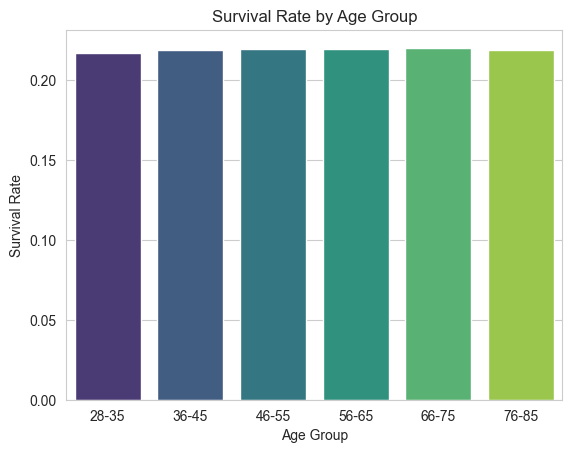

In [19]:
# Calculate survival rates by age group
survival_rates_age = new_data.groupby('age_labels')['survived'].mean().reset_index()

# Plotting
sns.set_style('whitegrid')
sns.barplot(x='age_labels', y='survived', data=survival_rates_age, palette='viridis')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')

# Show the plot
plt.show()


C:\Users\upman\AppData\Local\Temp\ipykernel_34744\811403592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cancer_stage', y='survived', data=survival_rates_stage, palette='viridis')


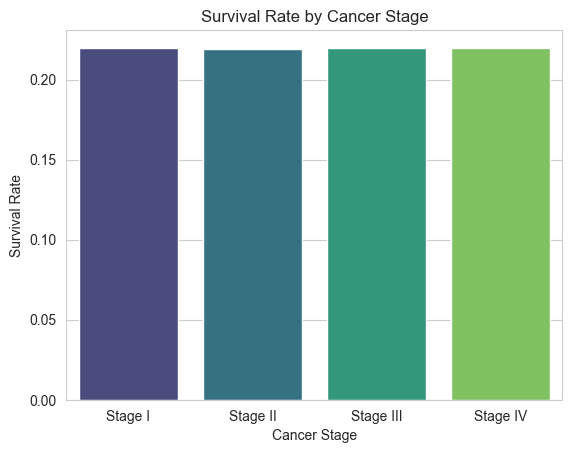

In [20]:
# Calculate survival rates by cancer stage
survival_rates_stage = new_data.groupby('cancer_stage')['survived'].mean().reset_index()

# Plotting
sns.set_style('whitegrid')
sns.barplot(x='cancer_stage', y='survived', data=survival_rates_stage, palette='viridis')

# Add labels and title
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Cancer Stage')

# Show the plot
plt.show()


In [21]:
#Understanding Dependence on Gender
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='gender',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [22]:
#Understanding Dependence on family_history
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='family_history',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [23]:
#Understanding Dependence on hypertension
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='hypertension',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [24]:
#Understanding Dependence on Asthma
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='asthma',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [25]:
#Understanding Dependence on Cirrhosis
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='cirrhosis',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [26]:
#Understanding Dependence on Country
sns.set_style('whitegrid')
sns.countplot(x='country',hue='survived',data=new_data)
print(new_data['survived'].value_counts())

survived
0    2521385
1     709470
Name: count, dtype: int64


In [27]:
#Understanding Dependence on Other_Cancer
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='other_cancer',data=new_data)
print(new_data['survived'].value_counts())

#No observations are made .

survived
0    2521385
1     709470
Name: count, dtype: int64


In [28]:
age_survival = new_data.groupby('age_labels')['survived'].value_counts(normalize=True).unstack() * 100
age_survival

C:\Users\upman\AppData\Local\Temp\ipykernel_34744\3284456431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = new_data.groupby('age_labels')['survived'].value_counts(normalize=True).unstack() * 100


survived,0,1
age_labels,,
28-35,78.268200,21.731800
36-45,78.106500,21.893500
46-55,78.046628,21.953372
56-65,78.018442,21.981558
66-75,77.954485,22.045515
76-85,78.114893,21.885107


C:\Users\upman\AppData\Local\Temp\ipykernel_34744\1063943148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cancer_stage', y='survived', data=new_data, palette='viridis', edgecolor=None, linewidth=0)


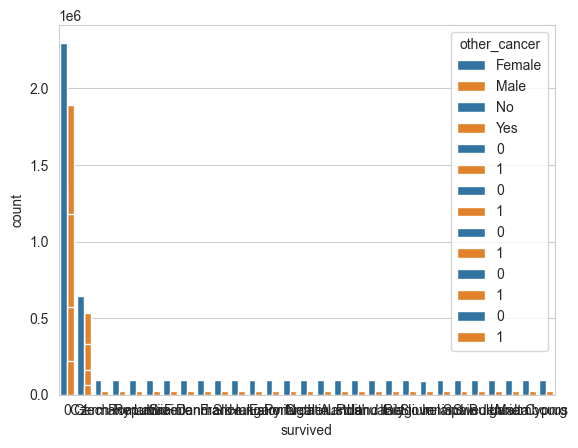

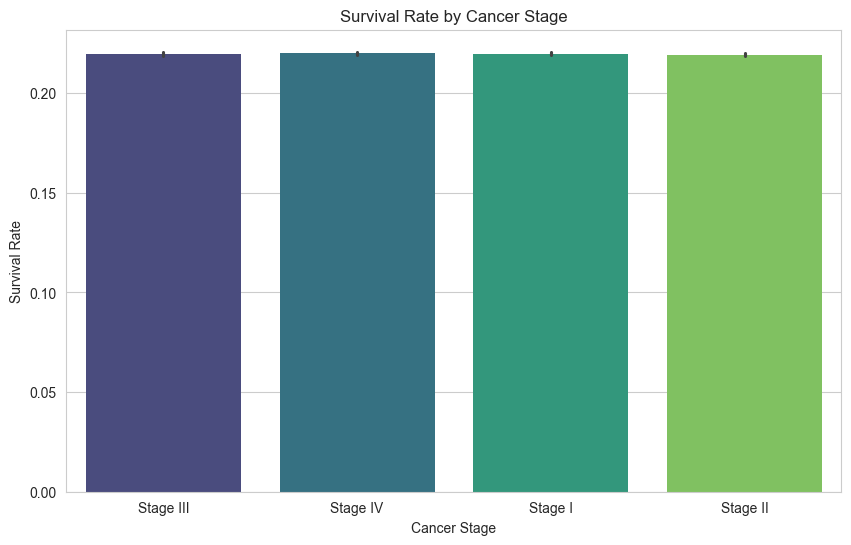

In [29]:
plt.figure(figsize=(10, 6))

sns.barplot(x='cancer_stage', y='survived', data=new_data, palette='viridis', edgecolor=None, linewidth=0)

# Add labels and title
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Cancer Stage')

plt.show()

In [30]:
# Calculate survival rates by cancer stage
stage_survival = new_data.groupby('cancer_stage')['survived'].value_counts(normalize=True).unstack() * 100

age_survival, stage_survival


(survived            0          1
 age_labels                      
 28-35       78.268200  21.731800
 36-45       78.106500  21.893500
 46-55       78.046628  21.953372
 56-65       78.018442  21.981558
 66-75       77.954485  22.045515
 76-85       78.114893  21.885107,
 survived              0          1
 cancer_stage                      
 Stage I       78.031240  21.968760
 Stage II      78.076003  21.923997
 Stage III     78.045242  21.954758
 Stage IV      78.010713  21.989287)

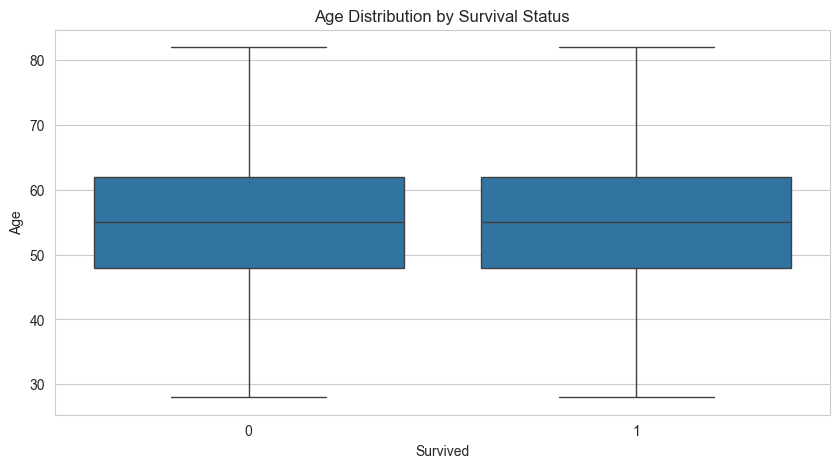

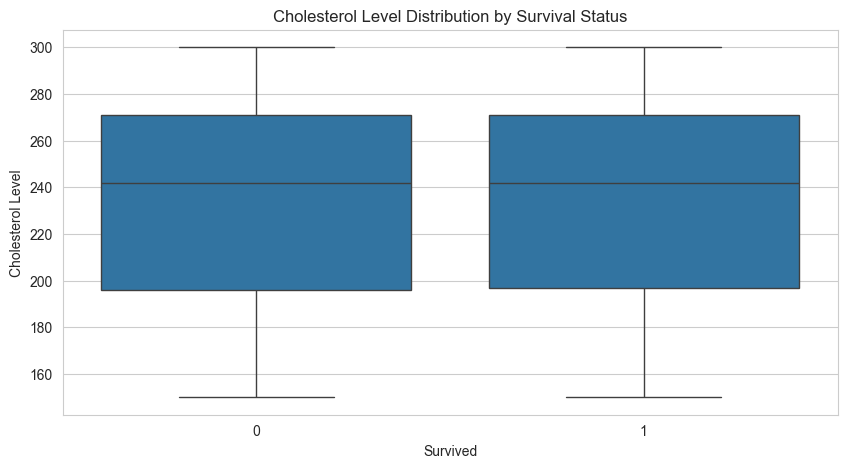

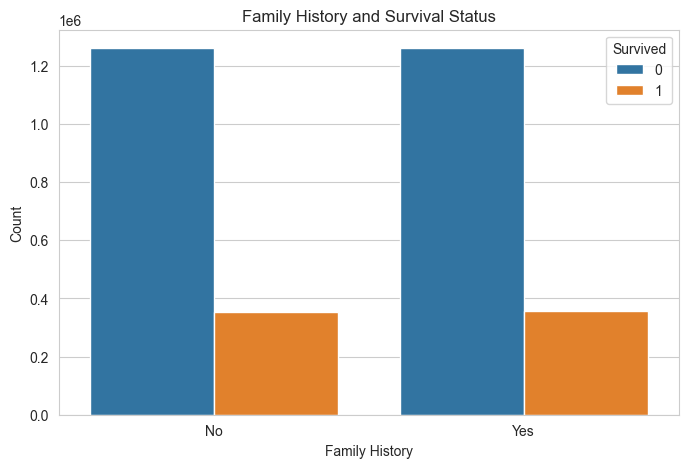

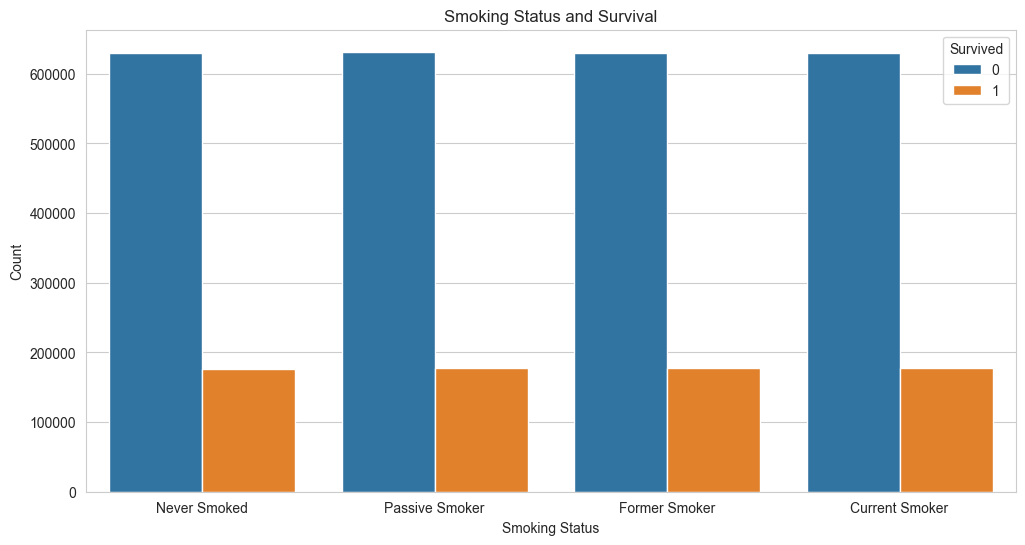

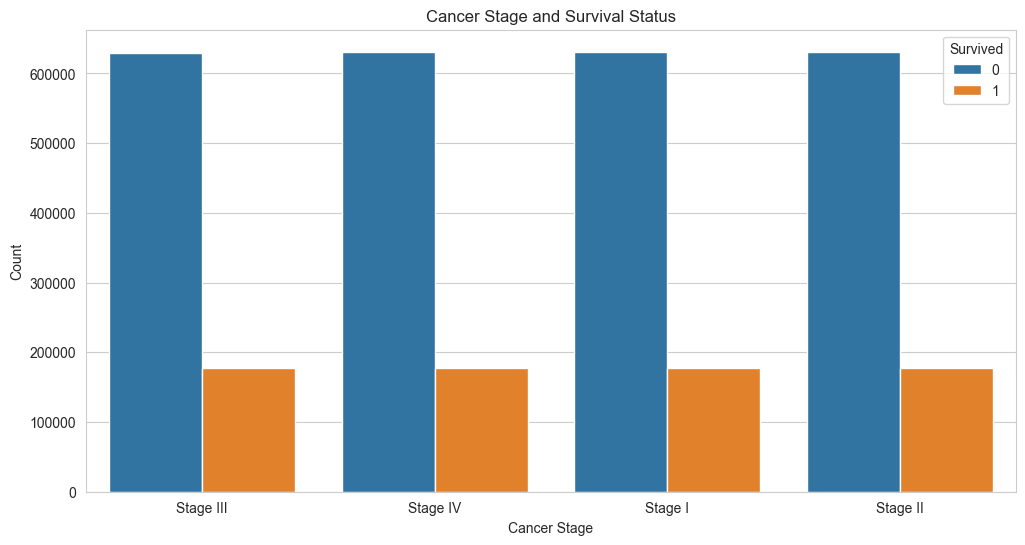

In [31]:

# Step 2: Analyzing distribution of age with respect to survival status
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_data, x="survived", y="age")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

# Step 3: Analyzing distribution of cholesterol levels with respect to survival status
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_data, x="survived", y="cholesterol_level")
plt.title("Cholesterol Level Distribution by Survival Status")
plt.xlabel("Survived")
plt.ylabel("Cholesterol Level")
plt.show()

# Step 4: Checking the influence of family history on survival
plt.figure(figsize=(8, 5))
sns.countplot(data=new_data, x="family_history", hue="survived")
plt.title("Family History and Survival Status")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

# Step 5: Checking the influence of smoking status on survival
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, x="smoking_status", hue="survived")
plt.title("Smoking Status and Survival")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

# Step 6: Cancer stage analysis with survival
plt.figure(figsize=(12, 6))
sns.countplot(data=new_data, x="cancer_stage", hue="survived")
plt.title("Cancer Stage and Survival Status")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

In [32]:
#one-hot Encoding
data = pd.get_dummies(new_data, columns=['gender','family_history','cancer_stage','smoking_status','treatment_type','country'])
print(data.head().to_string())

   id   age   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  survived  age_normalized  bmi_normslized  cholesterol_normslized age_labels  gender_Female  gender_Male  family_history_No  family_history_Yes  cancer_stage_Stage I  cancer_stage_Stage II  cancer_stage_Stage III  cancer_stage_Stage IV  smoking_status_Current Smoker  smoking_status_Former Smoker  smoking_status_Never Smoked  smoking_status_Passive Smoker  treatment_type_Chemotherapy  treatment_type_Combined  treatment_type_Radiation  treatment_type_Surgery  country_Austria  country_Belgium  country_Bulgaria  country_Croatia  country_Cyprus  country_Czech Republic  country_Denmark  country_Estonia  country_Finland  country_France  country_Germany  country_Greece  country_Hungary  country_Ireland  country_Italy  country_Latvia  country_Lithuania  country_Luxembourg  country_Malta  country_Netherlands  country_Poland  country_Portugal  country_Romania  country_Slovakia  country_Slovenia  country_Spain  cou

In [33]:
# Calculate the correlation matrix for numeric columns only
correlation_matrix = data[['age','bmi', 'cholesterol_level','family_history_No','family_history_Yes','gender_Male','gender_Female','cancer_stage_Stage I','cancer_stage_Stage II','cancer_stage_Stage III','cancer_stage_Stage IV','survived']].corr()

print(correlation_matrix.to_string())

                             age       bmi  cholesterol_level  family_history_No  family_history_Yes  gender_Male  gender_Female  cancer_stage_Stage I  cancer_stage_Stage II  cancer_stage_Stage III  cancer_stage_Stage IV  survived
age                     1.000000 -0.001091          -0.001168           0.000196           -0.000196    -0.000294       0.000294              0.000017               0.000612                0.000249              -0.000877  0.001278
bmi                    -0.001091  1.000000           0.747103          -0.000196            0.000196     0.001286      -0.001286              0.000331               0.000129               -0.000655               0.000194  0.000145
cholesterol_level      -0.001168  0.747103           1.000000           0.000147           -0.000147     0.000757      -0.000757              0.000259              -0.000042               -0.000210              -0.000008  0.000954
family_history_No       0.000196 -0.000196           0.000147           1.00

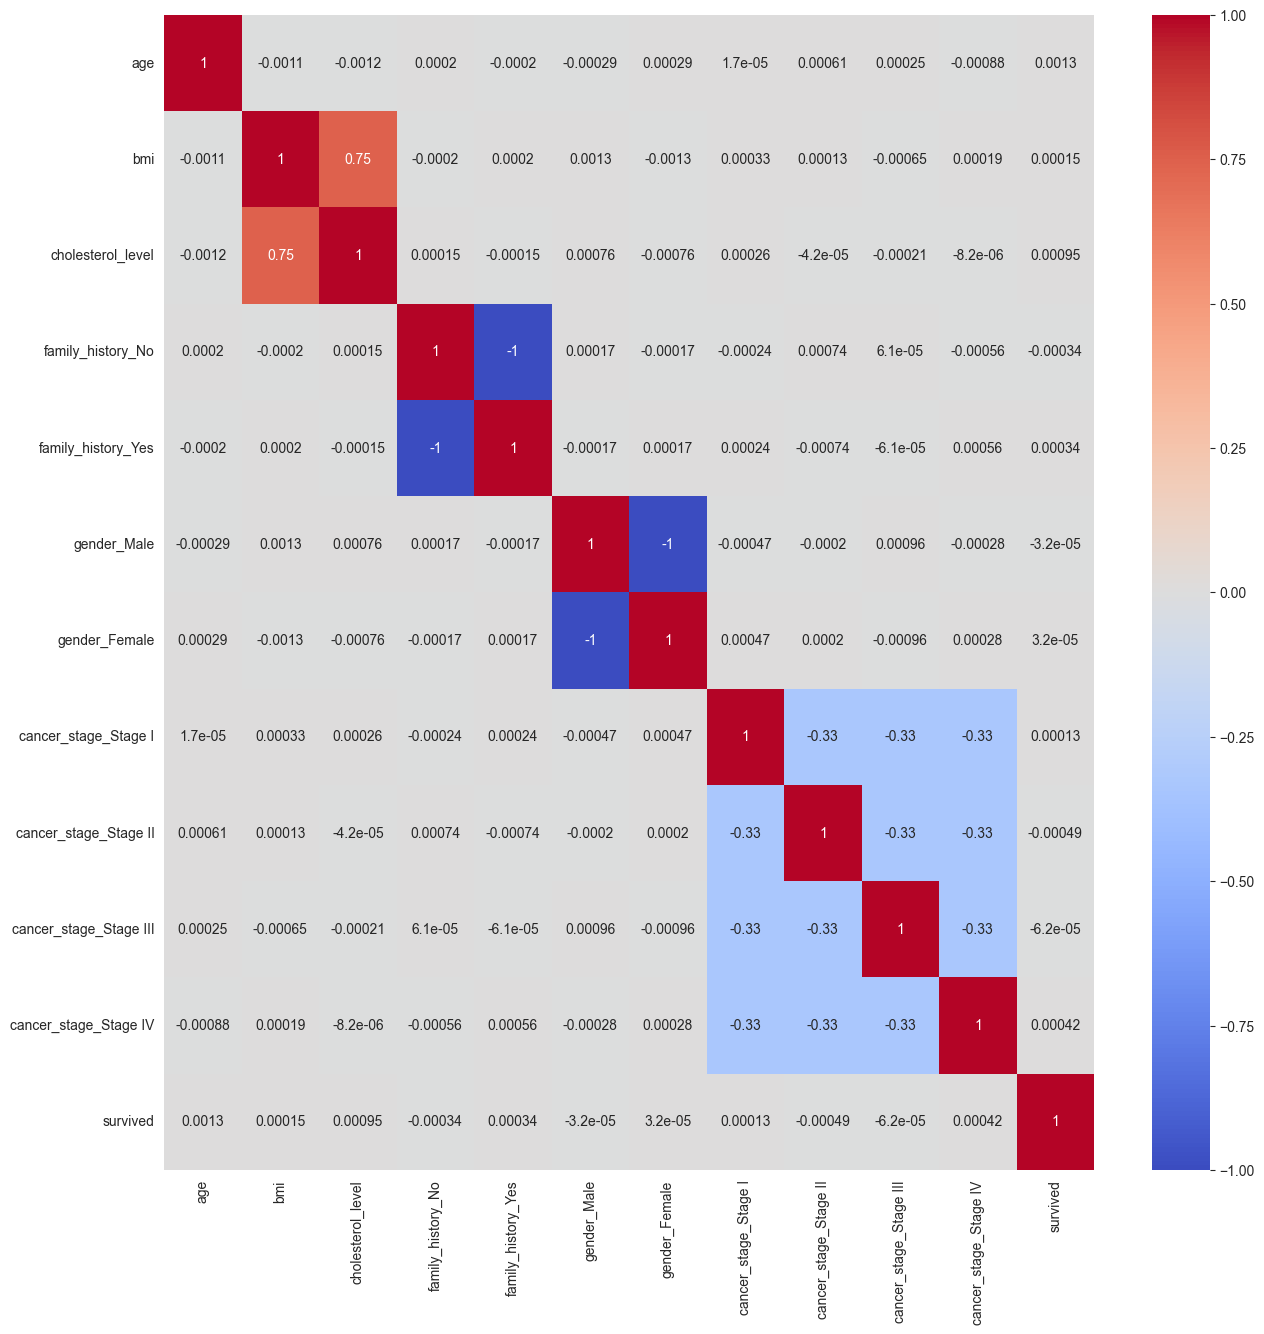

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

Making Models

Accuracy: 0.7385475361785039
KNN F1 Score: 0.6849616604096916


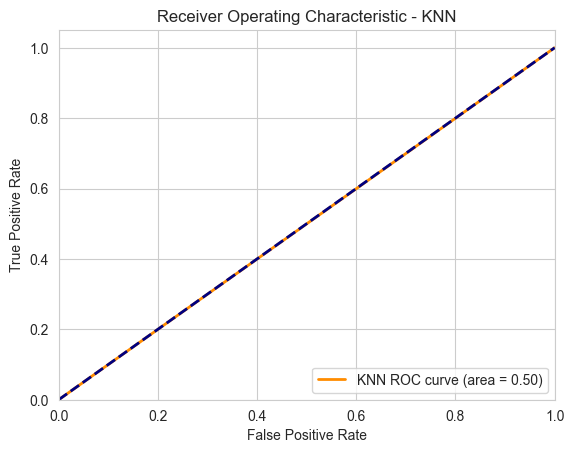

In [35]:
#KNN METHOD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Data Preparation
# Assuming 'survived' is the target variable and other relevant columns are features
# values with positive co relation
X = data[['age','bmi', 'cholesterol_level','family_history_Yes','gender_Female','cancer_stage_Stage I','cancer_stage_Stage IV']]  # Select features
y = data['survived']  # Target variable

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"KNN F1 Score: {knn_f1}")

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
knn_y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_prob)
knn_roc_auc = roc_auc_score(y_test, knn_y_prob)

plt.figure()
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

In [36]:
#Desicion Tree Method
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Data Preparation
# Assuming 'cancer_stage' is the target variable and other relevant columns are features
X = data[['age','bmi', 'cholesterol_level','family_history_Yes','gender_Female','cancer_stage_Stage I','cancer_stage_Stage IV']]  # Select features
y = data['survived']  # Target variable

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Optional for Decision Tree)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import f1_score
dt_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Decision Tree F1 Score: {dt_f1}")

# Predict probabilities
dt_y_prob = dt.predict_proba(X_test)[:, 1]



Accuracy: 0.660159617191115
Decision Tree F1 Score: 0.6583970821653512


In [37]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Data Preparation
# Assuming 'cancer_stage' is the target variable and other relevant columns are features
X = data[['age','bmi', 'cholesterol_level','family_history_Yes','gender_Female','cancer_stage_Stage I','cancer_stage_Stage IV']]  # Select features
y = data['survived']  # Target variable

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import f1_score
log_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Logistic Regression F1 Score: {log_f1}")



Accuracy: 0.7801510745607587
Logistic Regression F1 Score: 0.6838022995194198


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Data Preparation
X = data[['age', 'bmi', 'cholesterol_level', 'family_history_Yes', 'gender_Female', 'cancer_stage_Stage I', 'cancer_stage_Stage IV']]
y = data['survived']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

rf_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Random Forest F1 Score: {rf_f1}")

# Predict probabilities
rf_y_prob = rf.predict_proba(X_test)[:, 1]



Accuracy: 0.7211713308087179
Random Forest F1 Score: 0.6808669407047457


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Data Preparation
X = data[['age', 'bmi', 'cholesterol_level', 'family_history_Yes', 'gender_Female', 'cancer_stage_Stage I', 'cancer_stage_Stage IV']]
y = data['survived']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training
svm = SVC(probability=True)  # Enable probability estimates
svm.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

svm_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"SVM F1 Score: {svm_f1}")

# Predict probabilities
svm_y_prob = svm.predict_proba(X_test)[:, 1]


In [ ]:
#Random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Remove 'asthma' and 'hypertension' columns
sampled_df = sampled_df.drop(['asthma', 'hypertension'], axis=1)

# 2. Data Preparation
X = sampled_df[['age', 'bmi', 'cholesterol_level', 'cancer_stage']]  # Removed 'gender', 'asthma', 'hypertension'
y = sampled_df['survived']

# Convert 'cancer_stage' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['cancer_stage'], drop_first=True)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# 6. Prediction (Example)
new_data = pd.DataFrame({'age': [50], 'bmi': [25], 'cholesterol_level': [200],
                         'cancer_stage_Stage II': [0],
                         'cancer_stage_Stage III': [0],
                         'cancer_stage_Stage IV': [0]})  # Removed 'gender_Male', 'asthma', 'hypertension'

# Add missing columns and fill with 0 if they are not present in new_data
for col in X_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Reorder columns to match the order in X_train
new_data = new_data[X_train.columns]

# Random Forest Prediction
prediction_rf = rf_model.predict(new_data)
print(f"Random Forest Prediction for new data: {prediction_rf[0]}")  # 0 or 1